In [285]:
import pandas as pd

In [286]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [287]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [288]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.576535
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [289]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())


In [290]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [291]:
df_test = df_test.drop(['Ticket'], axis=1)
df_train = df_train.drop(['Ticket'], axis=1)

In [292]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [293]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [294]:
print df_train['Sex'].unique()

['male' 'female']


In [295]:
def sex_num(x):
    if x=='male' : return 0
    else: return 1

In [296]:
df_train['Sex'] = df_train['Sex'].apply(sex_num)
df_test['Sex'] = df_test['Sex'].apply(sex_num)

In [297]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [298]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [299]:
df_test['family_size'] = df_test['SibSp'] + df_test['Parch'] + 1
df_train['family_size'] = df_train['SibSp'] + df_train['Parch'] + 1

In [300]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
family_size      int64
dtype: object

In [301]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
family_size      int64
dtype: object

In [302]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [303]:
df_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [304]:
df_train['Embarked'] = df_train['Embarked'].fillna("S")

In [305]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [306]:
def embarked_num(x):
    if x.find('S')>-1 : return 0
    if x.find('C')>-1 : return 1
    if x.find('Q')>-1 : return 2

In [307]:
df_train['Embarked'] = df_train['Embarked'].apply(embarked_num)

In [308]:
df_test['Embarked'] = df_test['Embarked'].apply(embarked_num)

In [309]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked         int64
family_size      int64
dtype: object

In [310]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked         int64
family_size      int64
dtype: object

In [311]:
'Braund, Mr. Owen Harris'.split(',')[-1].split('.')[0].strip()

'Mr'

In [312]:
def get_title(x):
    return x.split(',')[-1].split('.')[0].strip()

In [313]:
get_title('Braund, Mr. Owen Harris')

'Mr'

In [314]:
df_train['salutation'] = df_train['Name'].apply(get_title)
df_test['salutation'] = df_test['Name'].apply(get_title)

In [315]:
df_train['salutation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [316]:
def salutation_num(x):
    if x in ['Don','Major','Capt','Jonkheer','Rev','Col', 'Sir', 'Master', 'Dr']: return 'Mr'
    elif x in ['the Countess','Mme', 'Lady', 'Dona'] : return 'Mrs'
    elif x in ['Mlle', 'Ms'] : return 'Miss'
    else: return x
    

In [317]:
df_train['salutation'] = df_train['salutation'].apply(salutation_num)
df_test['salutation'] = df_test['salutation'].apply(salutation_num)

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

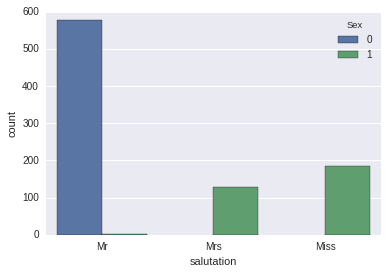

In [319]:
sns.countplot(df_train['salutation'], hue=df_train['Sex'])

In [320]:
pd.crosstab(df_train["salutation"],df_train["Sex"],margins=True)

Sex,0,1,All
salutation,,,
Miss,0,185,185
Mr,577,1,578
Mrs,0,128,128
All,577,314,891


In [321]:
pd.crosstab(df_test["salutation"],df_test["Sex"], margins=True)

Sex,0,1,All
salutation,,,
Miss,0,79,79
Mr,266,0,266
Mrs,0,73,73
All,266,152,418


In [322]:
#df_train.to_csv('titanic_train_cleaned_features.csv', index=False)

In [323]:
df_train_cleaned = pd.read_csv('titanic_train_cleaned_features.csv')

In [324]:
df_train_cleaned.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392,1.904602
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,11.000000


In [325]:
df_train_cleaned.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked         int64
family_size      int64
salutation      object
dtype: object

In [326]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked         int64
family_size      int64
salutation      object
dtype: object

In [329]:
pd.crosstab(df_train_cleaned['Sex'], df_train_cleaned['salutation'], margins= True)

salutation,Miss,Mr,Mrs,All
Sex,,,,
0,0,577,0,577
1,185,0,129,314
All,185,577,129,891


In [330]:
def convert_salutation(x):
    if x == 'Mr' : return 0
    elif x== 'Mrs' : return 1
    elif x== 'Miss' : return 2

In [331]:
df_train_cleaned['salutation'] = df_train_cleaned['salutation'].apply(convert_salutation)
df_test['salutation'] = df_test['salutation'].apply(convert_salutation)

In [332]:
df_train_cleaned.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked         int64
family_size      int64
salutation       int64
dtype: object

In [333]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked         int64
family_size      int64
salutation       int64
dtype: object

In [334]:
df_train_cleaned = df_train_cleaned.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

In [335]:
df_train_cleaned.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked         int64
family_size      int64
salutation       int64
dtype: object

In [336]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked         int64
family_size      int64
salutation       int64
dtype: object

In [337]:
df_train_cleaned.to_csv('titanic_train_cleaned_features.csv', index=False)
df_test.to_csv('titanic_test_cleaned.csv', index=False)